# Reshaping Exercises

<span style="color: #008080">*Bárbara Flores*</span>

Before diving into actually doing some exercises, a few notes about reshaping in `pandas`. 

**So many tools:** As is so often the case with `pandas`, when there are multiple ways that something can be done, `pandas` implements all of them, even it if results in a lot of duplication of funcationality. As a result, there are several sets of methods that do very similar things, and which can be hard to keep straights: 

- `melt` and `pivot`: Tools for moving a dataset from long-to-wide (`pivot`) or wide-to-long (`melt`).
- `pivot_table`: Like `pivot`, but allows you to do aggregations during the reshape if you want.
- `stack` and `unstack`: Like `melt` and `pivot`, but only for use when your variables are stored in indices. I don't use these much. 

Personally, **I find melt and pivot most useful.** `pivot_table` *can* do aggregations during the reshape, but you can always do aggregations yourself using `groupby`. :) 

Also, I have to go look at [these pictures](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)... every time I reshape. Don't hesistate to look them up for help!

**What SHOULD I want my data to look like?** Just a reminder that a natural question to ask is "in what format should I want my data?" Obviously this question is subjective, but as you read in the Hadley Wickham [piece I assigned](http://vita.had.co.nz/papers/tidy-data.html), this is a good standard definition for a "tidy" dataset to which we might aspire: 

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

In general, I'm a big fan of this approach, and I think it's a good one to use (especially numbers 1 and 2).

Note that the question of what forms an "observation" depends on the analysis you plan to run (which depends on the answer you seek to ask! See! EVERYTHING ALWAYS COMES BACK TO THE QUESTION YOU ARE SEEKING TO ANSWER!). Suppose you have data on GDP from different countries for many years. If you plan to run a panel analysis where each observation is a country-year, then each row should be a country-year. But if you plan to do a country-level analysis using measures of, say, GDP variation over time, then each row should be a country!



## Exercises!

So in this exercise, we're going to work with data from the World Development Indicators. Unlike in previous exercises, however, where I cleaned up the data before giving it to you, we'll be working with the raw data just as you would get it from the World Bank download site. 


## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_reshaping.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.

### Exercise 1

Import the data using a link from [here](https://github.com/nickeubank/MIDS_Data/blob/master/World_Development_Indicators/WDI_Data_csv.zip) and load it into pandas without unzipping it (did you know pandas will read zip files directly?!).

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

path = "https://github.com/nickeubank/MIDS_Data/raw/master/World_Development_Indicators/raw_WDI_Data_csv.zip"
WDI_Data = pd.read_csv(path, compression="zip")

WDI_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.007620,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.466653,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN


### Exercise 2

In this exercise, we'd like to look at the relationship between GDP and inequality across countries. So before anything else, thin down your dataset by getting only the rows related to:

- GDP per capita (in Constant US Dollars -- the "constant" means values are have been adjusted for inflation, so values from 1970 can be directly compared with 2010)
- Gini coefficient
- Information on income shares (what percentage of total income goes to X% of the income distribution). **There are 7 of these in total.**

Store the number of rows you get from this updated dataset in `"ex2_num_rows"`.

**NOTE:** this is non-trivial. This is a big dataset with LOTS of variables, so you'll have to use your data wrangling skills to see all the variables names. Remember that if you want to see all the entries in something but python compresses it (so it doesn't take up too much space), you can loop over it and print each item separately to make it show everything!

**NOTE 2:** If you _do_ print out all the variable names, please comment out the code before you submit your notebook so graders don't end up swimming in print-outs. 

In [2]:
# "Let's take a look at the variables that make up our dataset."

WDI_Data.groupby("Indicator Name")["Indicator Name"].count()

Indicator Name
2005 PPP conversion factor, GDP (LCU per international $)                                          264
2005 PPP conversion factor, private consumption (LCU per international $)                          264
ARI treatment (% of children under 5 taken to a health provider)                                   264
Access to clean fuels and technologies for cooking (% of population)                               264
Access to electricity (% of population)                                                            264
                                                                                                  ... 
Women who believe a husband is justified in beating his wife when she neglects the children (%)    264
Women who believe a husband is justified in beating his wife when she refuses sex with him (%)     264
Women who were first married by age 15 (% of women ages 20-24)                                     264
Women who were first married by age 18 (% of women ages 20

<span style="color: #008080">*We can see beforehand that we have 264 records for each variable.*</span>


In [3]:
# for indicator in WDI_Data["Indicator Name"].unique():
#    print(indicator)

<span style="color: #008080">*After thorough examination of our 264 variables, we have narrowed it down to 9 select variables that will be utilized for the remainder of the exercise.*</span>


In [4]:
selected_indicators = [
    "GDP per capita (constant 2010 US$)",
    "GINI index (World Bank estimate)",
    "Income share held by fourth 20%",
    "Income share held by highest 10%",
    "Income share held by highest 20%",
    "Income share held by lowest 10%",
    "Income share held by lowest 20%",
    "Income share held by second 20%",
    "Income share held by third 20%",
]

filtered_indicator_WDI_Data = WDI_Data[
    WDI_Data["Indicator Name"].isin(selected_indicators)
]

filtered_indicator_WDI_Data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
520,Arab World,ARB,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5945.678558,6021.163952,6278.734889,6336.581939,6354.885748,6430.464609,6507.882895,6447.294731,6458.734486,NaN


In [5]:
results = dict()
ex2_num_rows = len(filtered_indicator_WDI_Data)
results["ex2_num_rows"] = ex2_num_rows
print(
    f"The number of rows in our updated dataset, after filtering the variables of interest, is {ex2_num_rows:,}."
)

The number of rows in our updated dataset, after filtering the variables of interest, is 2,376.


### Exercise 3

OK, that makes our data a lot more manageable, but it's still pretty heinous.

In our analysis, we know that we'll want to have country-years as our units of observation, so let's start reshaping. Come up with a strategy that gets our inequality variables as columns, and makes each of our future observations (i.e. each country-year) a row. 

*Hint:* It can sometimes be helpful to drop useless columns before a reshape.

*Other hint:* Sometimes you will end up with your column names stored in a hierarchical (multi-level) `.column` object structure. As with hierarchical indices for rows, they’re a pain. (Whether this occurs depends on the exact syntax you use, so you may or may not get it).

The two easy ways to fix these hierarchical `.column` objects are:

- Just drop a level: df.columns.drop_level(0)` where 0 is which level you want to drop.
- Directly manipulate the column names by doing something to the df.columns object and re-assigning to df.columns. For example, you can just concatenate two columns levels (they're stored as tuples) with a dash between them with `df.columns = map(lambda x: str(x[0]) + "-" + str(x[1]), df.columns)`.

<span style="color: #008080">*First, let's delete the columns that we won't use*</span>

In [6]:
columns_to_drop = ["Country Code", "Indicator Code", "Unnamed: 63"]
filtered_indicator_WDI_Data = filtered_indicator_WDI_Data.drop(columns_to_drop, axis=1)

filtered_indicator_WDI_Data.head(2)

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
520,Arab World,GDP per capita (constant 2010 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5810.11207,5945.678558,6021.163952,6278.734889,6336.581939,6354.885748,6430.464609,6507.882895,6447.294731,6458.734486
540,Arab World,GINI index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: #008080">*Second, we will transform our data from wide to long, turning each year into a row.*</span>


In [7]:
filtered_indicator_long_WDI_Data = filtered_indicator_WDI_Data.melt(
    id_vars=["Country Name", "Indicator Name"], var_name="year"
)

filtered_indicator_long_WDI_Data.head()

,Country Name,Indicator Name,year,value
0,Arab World,GDP per capita (constant 2010 US$),1960,NaN
1,Arab World,GINI index (World Bank estimate),1960,NaN
2,Arab World,Income share held by fourth 20%,1960,NaN
3,Arab World,Income share held by highest 10%,1960,NaN
4,Arab World,Income share held by highest 20%,1960,NaN


In [8]:
filtered_indicator_wide_WDI_Data = filtered_indicator_long_WDI_Data.pivot(
    index=["Country Name", "year"], columns="Indicator Name", values="value"
).reset_index()

filtered_indicator_wide_WDI_Data.head()

Indicator Name,Country Name,year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise 4

Now that you've done your reshapes, subset for observations that are post-1980. Store the number of rows in your reshaped data with only data from the years after 1980 in `"ex4_num_rows"`.

In [9]:
# "Even though 'year' is a string, it is possible to filter by >= '1980'
# since alphabetical order serves the same purpose in this case."

filtered_indicator_wide_1980_2018_WDI_Data = filtered_indicator_wide_WDI_Data[
    filtered_indicator_wide_WDI_Data["year"] > "1980"
]

ex4_num_rows = len(filtered_indicator_wide_1980_2018_WDI_Data)
results["ex4_num_rows"] = ex4_num_rows

print(
    f"After performing the previous transformations, the reshaped\n"
    f"dataset with only entries from the years after 1980 has {ex4_num_rows:,} rows."
)

After performing the previous transformations, the reshaped
dataset with only entries from the years after 1980 has 10,032 rows.


### Exercise 5

Subset for observations for which we have GINI index estimates. How many unique *countries* do you end up with? Store this answer in `ex5_num_countries`.

In [10]:
filtered_indicator_wide_1980_2018_gini_WDI_Data = (
    filtered_indicator_wide_1980_2018_WDI_Data[
        filtered_indicator_wide_1980_2018_WDI_Data[
            "GINI index (World Bank estimate)"
        ].notna()
    ]
)

ex5_num_countries = filtered_indicator_wide_1980_2018_gini_WDI_Data[
    "Country Name"
].nunique()

results["ex5_num_countries"] = ex5_num_countries

In [11]:
filtered_indicator_wide_1980_2018_gini_WDI_Data.head()

Indicator Name,Country Name,year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
95,Albania,1996,1869.871270,27.0,23.3,21.2,36.1,3.9,9.2,13.7,17.7
101,Albania,2002,2572.728858,31.7,22.2,25.4,40.4,3.5,8.4,12.6,16.5
104,Albania,2005,3062.682723,30.6,22.5,24.3,39.2,3.5,8.4,12.9,17.0
107,Albania,2008,3775.592212,30.0,22.2,24.5,39.0,3.7,8.9,13.1,16.8
111,Albania,2012,4276.620248,29.0,22.8,22.9,37.8,3.7,8.9,13.2,17.3


### Exercise 6

Plot the relationship between **log** GDP per capita and Gini scores for all country years and add a linear fit as well. Is higher inequality associated with higher log GDP? Store your answer (as `"yes"` or `"no"`) in `results` under the key `"ex6_relationship"`.

In [12]:
filtered_indicator_wide_1980_2018_gini_WDI_Data = (
    filtered_indicator_wide_1980_2018_gini_WDI_Data.copy()
)


filtered_indicator_wide_1980_2018_gini_WDI_Data[
    "Log GDP per capita (constant 2010 US$)"
] = np.log(
    filtered_indicator_wide_1980_2018_gini_WDI_Data[
        "GDP per capita (constant 2010 US$)"
    ]
)

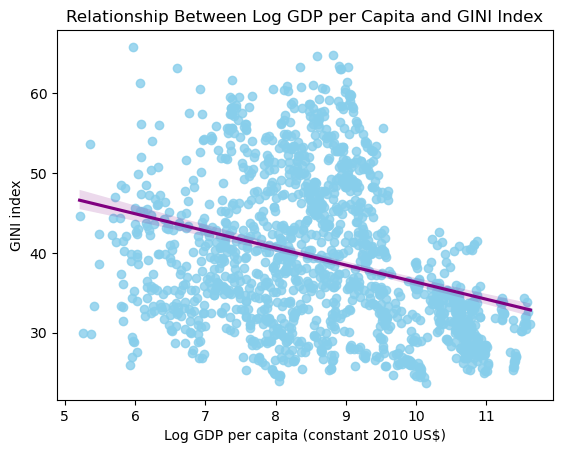

In [13]:
x = filtered_indicator_wide_1980_2018_gini_WDI_Data[
    "Log GDP per capita (constant 2010 US$)"
]
y = filtered_indicator_wide_1980_2018_gini_WDI_Data["GINI index (World Bank estimate)"]


sns.regplot(x=x, y=y, color="purple", scatter_kws={"color": "skyblue"})

plt.xlabel("Log GDP per capita (constant 2010 US$)")
plt.ylabel("GINI index")
plt.title("Relationship Between Log GDP per Capita and GINI Index")

plt.show()

In [14]:
ex6_relationship = "no"
results["ex6_relationship"] = ex6_relationship

print(
    f"After plotting the variables of interest, we can observe that it is not true that higher inequality is associated "
    f"\nwith a higher logarithm of GDP. Therefore, the answer to the question is '{ex6_relationship}', our hypothesis was incorrect."
)

After plotting the variables of interest, we can observe that it is not true that higher inequality is associated 
with a higher logarithm of GDP. Therefore, the answer to the question is 'no', our hypothesis was incorrect.


### Exercise 7

It's important to not always rely too much on a single measure of something like inequality. To check the robustness of our result, let's be sure to also look at the relationship between inequality and income by using the income share of the richest 10% instead of just the Gini coefficient. Plot that relationship.

Do you also find that income inequality (as measured by the share of income accruing to the top 10% of earners) is positively or negatively correlated with gdp per capita? Store your answer in your `results` dict under the key `"ex7_relationship"` as the string `"positively correlated"` or the string `"negatively correlated"`.

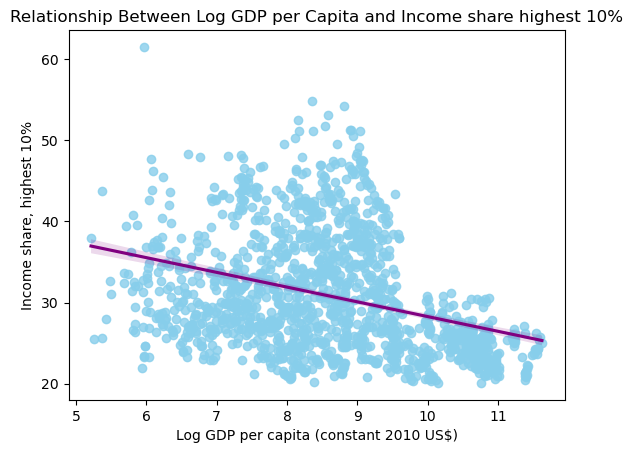

In [15]:
x = filtered_indicator_wide_1980_2018_gini_WDI_Data[
    "Log GDP per capita (constant 2010 US$)"
]
y = filtered_indicator_wide_1980_2018_gini_WDI_Data["Income share held by highest 10%"]


sns.regplot(x=x, y=y, color="purple", scatter_kws={"color": "skyblue"})

plt.xlabel("Log GDP per capita (constant 2010 US$)")
plt.ylabel("Income share, highest 10%")
plt.title("Relationship Between Log GDP per Capita and Income share highest 10%")

plt.show()

In [16]:
ex7_relationship = "negatively correlated"
results["ex7_relationship"] = ex7_relationship

print(
    f"After analyzing the previous graph, we can see that the relationship\n"
    f"between income inequality and GDP per capita is {ex7_relationship}."
)

After analyzing the previous graph, we can see that the relationship
between income inequality and GDP per capita is negatively correlated.


### Exercise 8

This analysis has allowed us to evaluate whether richer countries tend to have greater income inequality, but it certainly has not established whether we should expect that as countries become wealthier, their income distribution will also become more even. In other words, we have established a correlation between income inequality and wealth, but we certainly have not established a causal relationship between wealth and income inequality.

One way we might be able to get better traction on this question is to look at whether, as individual countries become wealthier, their income distribution also becomes more even.

To answer this question, let's begin by subsetting our data to the years 2005 to 2015 (inclusive)—the period in which the largest number of countries in our data have inequality data. Then also subset for the set of countries with Gini data for all years in this period. This gives us what's called a *balanced panel*—a dataset in which we have data on entities *at a number of different points in time* (a panel dataset) and where at every point in time, we have data for the *same set of entities* (a balanced panel dataset). 

Balanced panels are very desirable because the fact that they contain the same entities at all moments in time means that any changes we measure over time are the result of real changes in the outcomes we care about and *not* the result of changes in the composition of our sample.

Store the number of countries still in your data in `"ex8_countries_in_panel"`.

In [17]:
filtered_indicator_wide_2005_2015_gini_WDI_Data = (
    filtered_indicator_wide_1980_2018_gini_WDI_Data[
        (filtered_indicator_wide_1980_2018_gini_WDI_Data["year"] >= "2005")
        & (filtered_indicator_wide_1980_2018_gini_WDI_Data["year"] <= "2015")
    ]
)

country_n_year = (
    filtered_indicator_wide_2005_2015_gini_WDI_Data.groupby("Country Name")["year"]
    .nunique()
    .reset_index()
)

country_n_year.head()

,Country Name,year
0,Albania,3
1,Algeria,1
2,Angola,1
3,Argentina,10
4,Armenia,11


In [18]:
countries = list(country_n_year[country_n_year["year"] == 11]["Country Name"])
ex8_countries_in_panel = len(countries)
results["ex8_countries_in_panel"] = ex8_countries_in_panel

print(
    f"The number of countries that have data for the period 2005 to 2015\n"
    f"in each year and that we will use in our balanced panels is: {ex8_countries_in_panel}"
)

The number of countries that have data for the period 2005 to 2015
in each year and that we will use in our balanced panels is: 42


In [19]:
balanced_panel = filtered_indicator_wide_2005_2015_gini_WDI_Data.copy()[
    filtered_indicator_wide_2005_2015_gini_WDI_Data["Country Name"].isin(countries)
]

### Exercise 9

Now, demean both Gini coefficient scores and log GDP per capita for all countries. In other words, for each country, calculate that country's average Gini score over this period and subtract that average from all of the country's Gini scores, then do the same for log GDP per capita. Then plot these countries' *demeaned* Gini scores against demeaned log GDP per capita.

Essentially, this is a way of looking at whether, when countries are richer than their average during this period, they have more equal income distributions than on average.

In [20]:
balanced_panel["Mean Gini per country"] = balanced_panel.groupby(["Country Name"])[
    "GINI index (World Bank estimate)"
].transform(np.mean)
balanced_panel["Mean Log GDP per country"] = balanced_panel.groupby(["Country Name"])[
    "Log GDP per capita (constant 2010 US$)"
].transform(np.mean)

balanced_panel["Demean GINI index (World Bank estimate)"] = (
    balanced_panel["GINI index (World Bank estimate)"]
    - balanced_panel["Mean Gini per country"]
)
balanced_panel["Demean Log GDP per capita (constant 2010 US$)"] = (
    balanced_panel["Log GDP per capita (constant 2010 US$)"]
    - balanced_panel["Mean Log GDP per country"]
)

balanced_panel.head()

Indicator Name,Country Name,year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Log GDP per capita (constant 2010 US$),Mean Gini per country,Mean Log GDP per country,Demean GINI index (World Bank estimate),Demean Log GDP per capita (constant 2010 US$)
576,Armenia,2005,2571.977128,36.0,20.2,30.8,44.7,3.3,8.1,11.8,15.2,7.852430,30.690909,8.12142,5.309091,-0.268989
577,Armenia,2006,2934.024882,29.7,22.1,24.5,38.8,3.7,8.9,13.1,17.0,7.984130,30.690909,8.12142,-0.990909,-0.137289
578,Armenia,2007,3366.664939,31.2,22.1,25.1,40.0,3.5,8.4,12.8,16.7,8.121678,30.690909,8.12142,0.509091,0.000258
579,Armenia,2008,3629.909091,29.2,22.4,23.7,38.4,3.9,9.1,13.1,17.0,8.196963,30.690909,8.12142,-1.490909,0.075543
580,Armenia,2009,3137.346098,28.0,22.4,22.9,37.5,4.0,9.4,13.5,17.2,8.051133,30.690909,8.12142,-2.690909,-0.070287


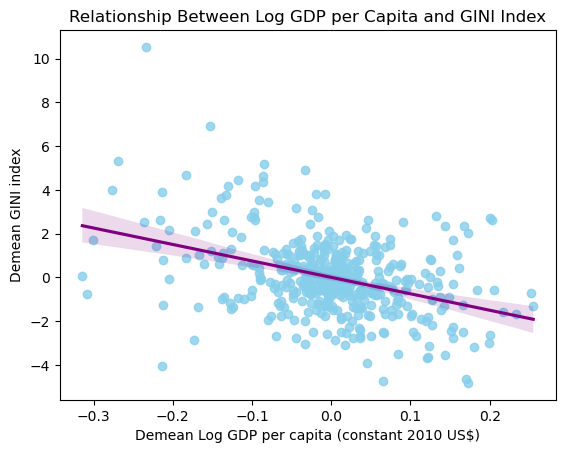

In [21]:
x = balanced_panel["Demean Log GDP per capita (constant 2010 US$)"]
y = balanced_panel["Demean GINI index (World Bank estimate)"]

sns.regplot(x=x, y=y, color="purple", scatter_kws={"color": "skyblue"})

plt.xlabel("Demean Log GDP per capita (constant 2010 US$)")
plt.ylabel("Demean GINI index")
plt.title("Relationship Between Log GDP per Capita and GINI Index")

plt.show()

### Exercise 10 

Calculate the correlation between these two demand outcomes in our balanced panel and store the result in `"ex10_demeaned_corr"`.

In [22]:
ex10_demeaned_corr = x.corr(y)
results["ex10_demeaned_corr"] = ex10_demeaned_corr
print(
    f"The correlation between demeaned Log GDP per capita and demeaned GINI index is: {ex10_demeaned_corr}"
)

The correlation between demeaned Log GDP per capita and demeaned GINI index is: -0.3899123518332567


<span style="color: #008080">*After conducting the analysis using a balanced panel and considering demeaned variables, we continue to observe a negative correlation between demeaned Log GDP per capita and demeaned GINI index. This suggests that as countries become richer compared to their average over a specific time period, they tend to have a more equal income distribution. While this correlation is a significant finding, it is essential to remember that it does not necessarily imply a direct causal relationship*</span>


In [23]:
results

{'ex2_num_rows': 2376,
 'ex4_num_rows': 10032,
 'ex5_num_countries': 164,
 'ex6_relationship': 'no',
 'ex7_relationship': 'negatively correlated',
 'ex8_countries_in_panel': 42,
 'ex10_demeaned_corr': -0.3899123518332567}

In [24]:
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}